<a href="https://colab.research.google.com/github/aaolcay/Analog-and-Digital-Communication/blob/main/DSB_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Understanding Double-Sideband Suppressed Carrier (DSB-SC) Modulation: Principle, Transient Effects, and Drawbacks**

In communication systems, modulation is the process of varying the properties of a high-frequency signal, called the carrier signal, with the information signal to be transmitted. Modulation techniques are used to efficiently utilize the available bandwidth of the communication channel.

DSB-SC modulation is a type of amplitude modulation (AM) technique that involves the modulation of a carrier signal with the message signal, resulting in a modulated signal that has both the upper and lower sidebands of the message signal but no carrier component. The carrier component is suppressed in DSB-SC modulation, hence the name.

This notebook, written by Abdullah A. Olcay, will discuss the principle of DSB-SC modulation, transient effects, and drawbacks of this modulation technique in communication systems. Anyone who wishes to use this notebook is kindly requested to credit Abdullah A. Olcay.

####**Modulation Equation**
The DSB-SC modulated signal can be expressed mathematically as:

$s(t) = A_c m(t) \cos(2\pi f_c t)$

where $m(t)$ is the message signal, $A_c$ is the amplitude of the carrier signal, $f_c$ is the frequency of the carrier signal, and $t$ is time.

The message signal $m(t)$ is multiplied by the carrier signal $\cos(2 \pi f_c t)$, resulting in a modulated signal that has the same frequency components as the message signal but with double the bandwidth.

####**Demodulation Equation**
To recover the message signal from the modulated DSB-SC signal, a demodulation process is required. The demodulation process involves multiplying the modulated signal with a local oscillator signal that has the same frequency and phase as the original carrier signal.

The demodulated signal can be expressed mathematically as:

$s_{demod}(t) = s(t) \cos(2\pi f_c t) = \frac{A_c A_m}{2}\cos(2\pi (f_c+f_m)t) + \frac{A_c A_m}{2}\cos(2\pi (f_c-f_m)t)$

The demodulated signal consists of the message signal and a double-frequency component of the message signal, which is usually filtered out to recover the original message signal.

####**Applications**
DSB-SC modulation is typically used when the channel bandwidth is wider than the bandwidth of the message signal. This is because the modulated signal has a larger bandwidth than the message signal, and transmitting the full modulated signal over a narrow channel may result in distortion of the signal.

DSB-SC modulation is commonly used in radio broadcasting, where the carrier component is suppressed to reduce interference with other signals. It is also used in radar systems for target detection and tracking.

####**Implementation**
Now that we have discussed the theory of DSB-SC modulation, we can move on to the code implementation of the same. We will implement DSB-SC modulation using Python and some of its libraries. We will generate the modulated signal and the message signal and plot both signals to understand their characteristics. Additionally, we will also demodulate the modulated signal and compare it with the original message signal.

We begin by importing the necessary libraries: numpy and matplotlib for signal processing and visualization, and scipy for filtering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

Next, we define the signal parameters that will be used to generate the modulated signal and the message signal. In this example, we use a message signal with a sine wave as the input signal. However, the code can be adapted to any other input signal.

In [2]:
# Signal parameters
A = 1      # Amplitude of message signal
fc = 100   # Carrier frequency
fm = 10    # Message frequency
fs = 1000  # Sampling frequency
N = 1000   # Length of the signal (samples)

We define the time vector `t` using the sampling frequency and signal length.

In [3]:
t = np.arange(0, N/fs, 1/fs)   # Time vector

The message signal is generated as a sine wave with a frequency `fm` and amplitude `A`.

In [4]:
m = A*np.sin(2*np.pi*fm*t)    # Message signal

We then generate the carrier signal as a cosine wave with a frequency `fc`.

In [5]:
c = np.cos(2*np.pi*fc*t)      # Carrier signal

The modulated signal is obtained by multiplying the message signal with the carrier signal.

In [6]:
s = m*c                       # Modulated signal

We now compute the magnitude spectrum of each signal using the fast Fourier transform (FFT) function provided by `numpy`.

In [7]:
freq = np.fft.fftshift(np.fft.fftfreq(len(m), 1/fs))
M = np.abs(np.fft.fftshift(np.fft.fft(m*np.hanning(len(t)))))   
C = np.abs(np.fft.fftshift(np.fft.fft(c*np.hanning(len(t)))))
S = np.abs(np.fft.fftshift(np.fft.fft(s*np.hanning(len(t)))))

The demodulation process is performed as follows:

1. Multiply the modulated signal `s` by the synchronous carrier signal `c` to obtain the intermediate signal `e`.

In [8]:
e = s*c

2. Apply a low-pass filter with a cut-off frequency higher than the message frequency to remove high-frequency components.

In [9]:
# Create a low-pass Butterworth filter with cutoff frequency 30 Hz
cutoff_freq = 30 # Hz
order = 5        # filter order
b, a = butter(order, cutoff_freq/(fs/2), 'lowpass')

# Apply the filter to the signal e
demodulated_signal = filtfilt(b, a, e)

3. The demodulated signal is half of the message signal, so it is multiplied by 2.

In [10]:
demodulated_signal = demodulated_signal*2

We can now plot the signals to understand their characteristics.

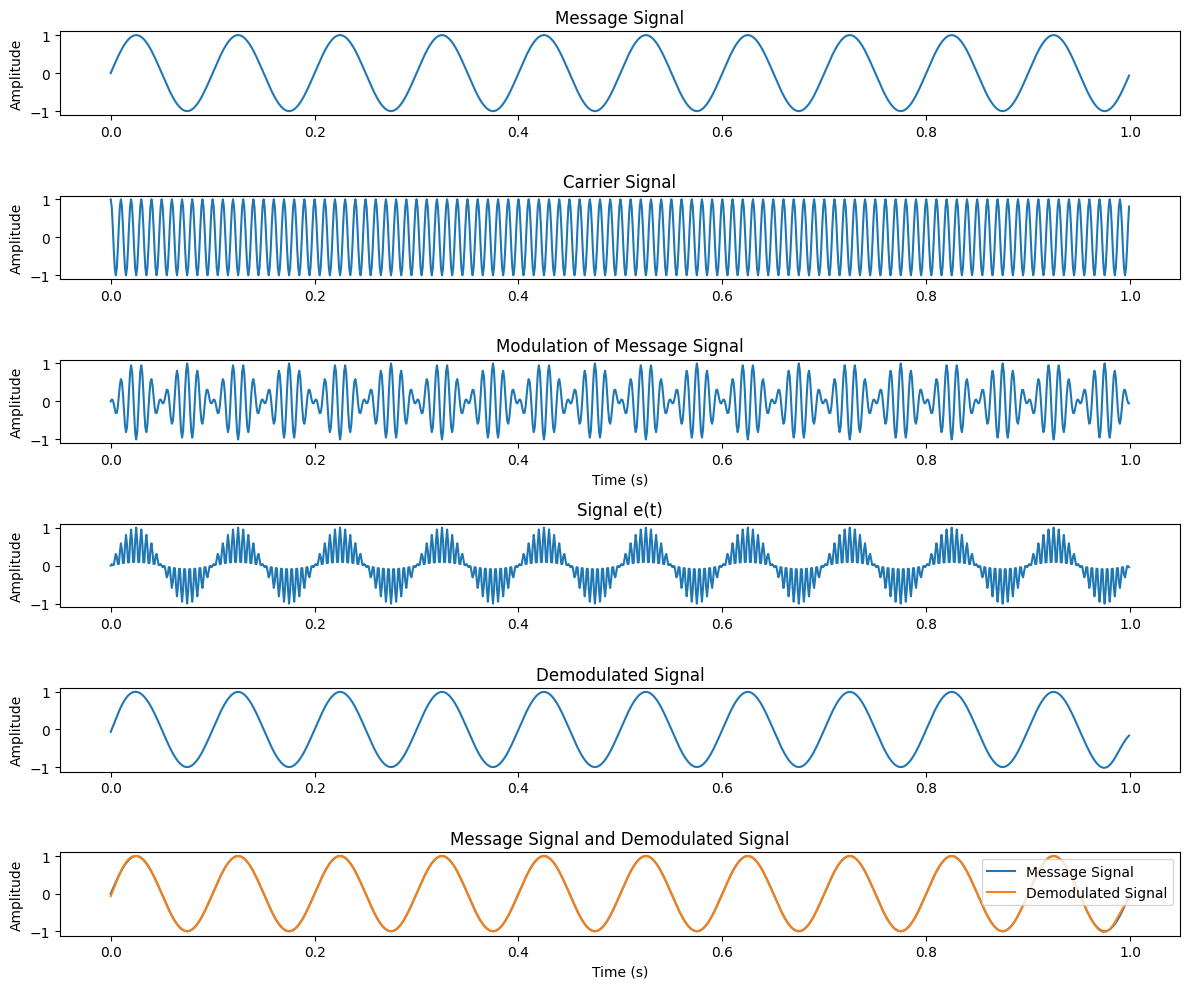

In [11]:
# Plot in Time Domain
fig, axs = plt.subplots(6, 1, figsize=(12, 10))
axs[0].plot(t, m)
axs[0].set_title('Message Signal')
axs[0].set_ylabel('Amplitude')
axs[1].plot(t, c)
axs[1].set_title('Carrier Signal')
axs[1].set_ylabel('Amplitude')
axs[2].plot(t, s)
axs[2].set_title('Modulation of Message Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[3].plot(t, e)
axs[3].set_title('Signal e(t)')
axs[3].set_ylabel('Amplitude')
axs[4].plot(t, demodulated_signal)
axs[4].set_title('Demodulated Signal')
axs[4].set_ylabel('Amplitude')
axs[5].plot(t, m)
axs[5].plot(t, demodulated_signal)
axs[5].set_title('Message Signal and Demodulated Signal')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Amplitude')
axs[5].legend(['Message Signal', 'Demodulated Signal'])
fig.tight_layout()
plt.show()

Finally, we plot the magnitude spectrums of the signals.

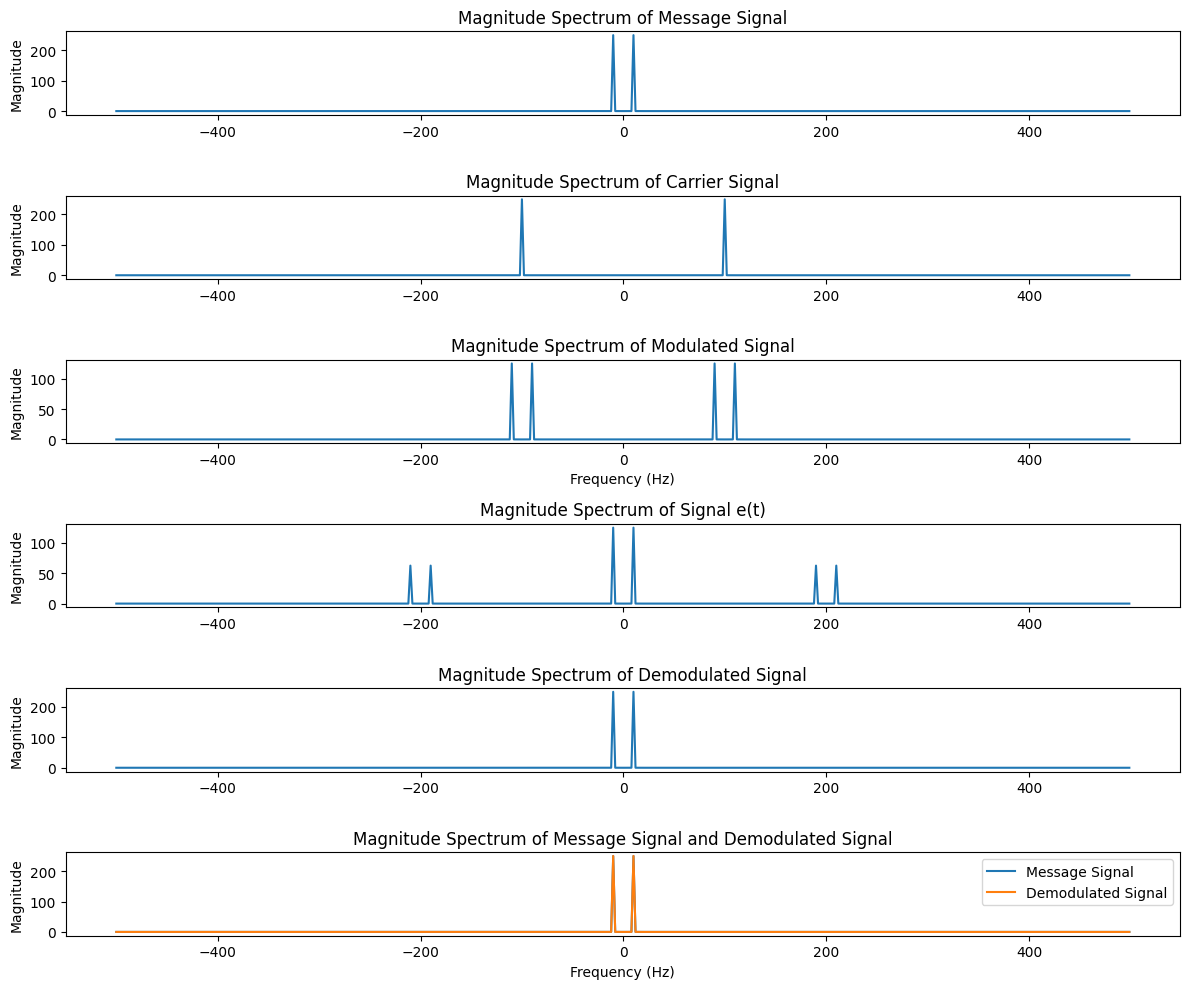

In [12]:
# Plot in Frequency Domain
fig, axs = plt.subplots(6, 1, figsize=(12, 10))
E = np.abs(np.fft.fftshift(np.fft.fft(e*np.hanning(len(t)))))
D = np.abs(np.fft.fftshift(np.fft.fft(demodulated_signal*np.hanning(len(t)))))

axs[0].plot(freq, M)
axs[0].set_title('Magnitude Spectrum of Message Signal')
axs[0].set_ylabel('Magnitude')
axs[1].plot(freq, C)
axs[1].set_title('Magnitude Spectrum of Carrier Signal')
axs[1].set_ylabel('Magnitude')
axs[2].plot(freq, S)
axs[2].set_title('Magnitude Spectrum of Modulated Signal')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Magnitude')

axs[3].plot(freq, E)
axs[3].set_title('Magnitude Spectrum of Signal e(t)')
axs[3].set_ylabel('Magnitude')
axs[4].plot(freq, D)
axs[4].set_title('Magnitude Spectrum of Demodulated Signal')
axs[4].set_ylabel('Magnitude')
axs[5].plot(freq, M)
axs[5].plot(freq, D)
axs[5].set_title('Magnitude Spectrum of Message Signal and Demodulated Signal')
axs[5].set_xlabel('Frequency (Hz)')
axs[5].set_ylabel('Magnitude')
axs[5].legend(['Message Signal', 'Demodulated Signal'])
fig.tight_layout()

plt.show()

If we choose the message signal as a cosine wave instead of a sine wave, there will be a transient effect in the modulated signal. This effect is caused by the abrupt phase shift at the beginning of the cosine wave. Let's see how this affects the modulated signal.

We can generate the cosine message signal with the same parameters used earlier as follows:

In [13]:
m = A*np.cos(2*np.pi*fm*t)    # Message signal

We can then calculate the modulated signal using the cosine message signal as follows:

In [14]:
s = A/2 * (np.cos(2*np.pi*(fc+fm)*t) + np.cos(2*np.pi*(fc-fm)*t))

Notice that the modulated signal is now a linear combination of two cosine waves with frequencies of `fc+fm` and `fc-fm`. When the message signal is a cosine wave, the frequency components of the modulated signal will be shifted in phase by different amounts depending on their frequency. This causes a transient effect, which appears as a burst of high-frequency noise at the beginning of the modulated signal.

To see this effect, we can plot the modulated signal and its magnitude spectrum as before:

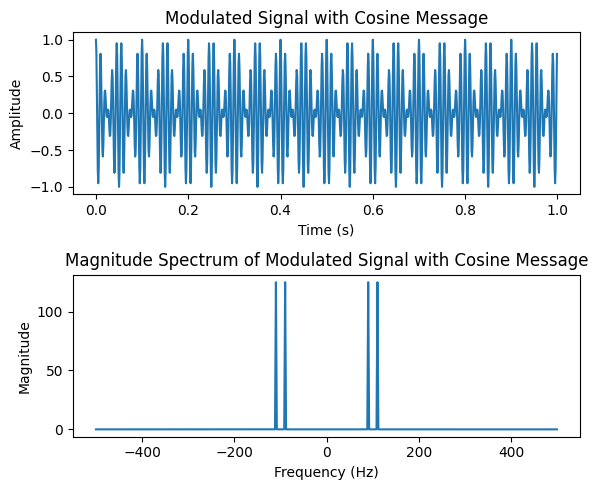

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(6, 5))
axs[0].plot(t, s)
axs[0].set_title('Modulated Signal with Cosine Message')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[1].plot(freq, np.abs(np.fft.fftshift(np.fft.fft(s*np.hanning(len(t))))))    
axs[1].set_title('Magnitude Spectrum of Modulated Signal with Cosine Message')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
fig.tight_layout()
plt.show()

The resulting plot will show a burst of high-frequency noise at the beginning of the modulated signal, which gradually decays as the signal progresses in time. The magnitude spectrum will show additional frequency components that were not present when the message signal was a sine wave.

To avoid this transient effect, we can use a window function to taper the message signal at the beginning and end, which reduces the abrupt phase shift at the beginning of the cosine wave. One commonly used window function is the Hanning window, which can be applied to the message signal as follows:

In [16]:
m = A*np.cos(2*np.pi*fm*t) * np.hanning(len(t))    # Message signal with Hanning window

With this modification, the transient effect will be significantly reduced. However, some high-frequency noise may still be present due to the discontinuity at the beginning and end of the message signal.

####**Drawbacks of DSB-SC**
Despite its advantages, DSB-SC modulation also has some drawbacks, including:

1. Carrier Recovery: The receiver needs a reliable carrier frequency reference to demodulate the signal correctly. Any drift in the carrier frequency will result in a significant loss of signal quality or even complete loss of the signal.

2. Power consumption: DSB-SC modulation requires twice the power of a conventional AM signal to transmit the same information. This can be a disadvantage when power efficiency is a primary concern, such as in battery-powered devices.

3. Complexity: DSB-SC modulation requires additional circuitry to generate and transmit the carrier signal, which adds to the overall complexity and cost of the system.

4. Limited bandwidth: DSB-SC modulation requires a bandwidth equal to the message bandwidth, which limits the number of signals that can be transmitted simultaneously over a given frequency band.

5. Susceptibility to noise: DSB-SC modulation is susceptible to noise and interference, which can degrade signal quality and make it more difficult to recover the original message signal at the receiver.

6. Limited suitability for analog modulation: DSB-SC modulation is not suitable for analog modulation since it cannot transmit DC signals. This limitation restricts its use in applications such as instrumentation and control systems, where DC signals are prevalent.

Overall, DSB-SC modulation has its advantages and disadvantages, and the choice of modulation scheme depends on the specific requirements of the communication system.